In [61]:
import pandas as pd
import numpy as np
import re
import string
import nltk
import nltk.corpus
from sklearn.feature_extraction.text import TfidfVectorizer
from TurkishStemmer import TurkishStemmer
from sklearn import cluster
from sklearn import feature_extraction
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from itertools import chain
from TurkishStemmer import TurkishStemmer
import matplotlib.pyplot as plt

In [85]:
df = pd.read_pickle('./clustered_test_998_group_4.pkl')
df = df.drop(df.columns[[1,2,4,5,3]], axis=1)
pd.set_option('max_colwidth', None)
df.head(1)

,Content
14053,"Euro Bölgesi büyüme öngörüsü altı yılın en düşüğünde\nIMF Euro Bölgesi büyüme öngörüsünü altı yılın en düşük düzeyine çekti\nUluslararası Para Fonu (IMF), Bölgesel Ekonomik Görünüm raporunda Euro Bölgesi gayrisafi yurt içi hasılasının son altı yılın en düşük büyüme hızına gerileyerek, 2019 yılında yüzde 0.1 düşüşle yüzde 1.2 düzeyinde gerçekleşeceğini öngördü.\nEuro Bölgesi için 2020 ve 2021 yılına ilişkin büyüme tahminlerini yüzde 1.5'ten yüzde 1.4'e düşüren IMF, düşüşün nedeni olarak Almanya ve İtalya ekonomilerinde görülen zayıflamayı gösterdi.IMF, 19 ülkeden oluşan Euro Bölgesi'nin bu yıl için büyüme öngörüsünü, daha önceki yüzde 1.3 düzeyinden yüzde 1.2'ye revize etti. Euro Bölgesi'nin 2018 büyümesi yüzde 1.9 düzeyindeydi.\nAlmanya ve İtalya için önceki büyüme tahminlerini revize eden IMF, yavaşlamanın çoğunlukla euro bölgesinin en büyük ekonomisi Almanya'daki zayıf büyüme ve üçüncü büyük ekonomisi İtalya'daki durgunluktan kaynaklandığını ifade etti.\nIMF Almanya ekonomisindeki büyüme beklentisini Nisan ayı tahmini olan yüzde 0.8'den yüzde 0.5'e ve İtalyan ekonomisinin de duraklayacağını öngörerek büyüme beklentisini yüzde 0.9'dan yüzde 0.5'e düşürdü.\nETİKETLER :\n \n IMF\n euro bölgesi"


In [86]:
myRegex = '!"#$%&\'()*+,-/:;<=>?@[\\]^_`{|}~'
stop_word_list = nltk.corpus.stopwords.words('turkish')
def clean_text(text):
    text = text.lower()
    text = re.sub('\[*?\]', ' ', text)
    text = re.sub('[%s]' % re.escape(myRegex), ' ', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', ' ', text)
    text = re.sub('\t', '', text)
    text = re.sub('\n', '', text)
    word_tokens = nltk.word_tokenize(text)
    filtered_sentences = [w for w in word_tokens if not w in stop_word_list]

    text = ' '.join(filtered_sentences)
    return text
    
round1 = lambda x: clean_text(x)

df = pd.DataFrame(df['Content'].apply(round1))

In [87]:
df['ready_data'] = df['Content'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df.head(1)


,Content,ready_data
14053,euro bölgesi büyüme öngörüsü altı yılın düşüğündeimf euro bölgesi büyüme öngörüsünü altı yılın düşük düzeyine çektiuluslararası para fonu imf bölgesel ekonomik görünüm raporunda euro bölgesi gayrisafi yurt içi hasılasının son altı yılın düşük büyüme hızına gerileyerek yılında yüzde . düşüşle yüzde . düzeyinde gerçekleşeceğini öngördü.euro bölgesi yılına ilişkin büyüme tahminlerini yüzde . ten yüzde . e düşüren imf düşüşün nedeni olarak almanya i̇talya ekonomilerinde görülen zayıflamayı gösterdi.imf ülkeden oluşan euro bölgesi nin yıl büyüme öngörüsünü önceki yüzde . düzeyinden yüzde . ye revize etti . euro bölgesi nin büyümesi yüzde . düzeyindeydi.almanya i̇talya önceki büyüme tahminlerini revize eden imf yavaşlamanın çoğunlukla euro bölgesinin büyük ekonomisi almanya daki zayıf büyüme üçüncü büyük ekonomisi i̇talya daki durgunluktan kaynaklandığını ifade etti.imf almanya ekonomisindeki büyüme beklentisini nisan ayı tahmini olan yüzde . den yüzde . e i̇talyan ekonomisinin duraklayacağını öngörerek büyüme beklentisini yüzde . dan yüzde . e düşürdü.eti̇ketler imf euro bölgesi,euro bölgesi büyüme öngörüsü altı yılın düşüğündeimf euro bölgesi büyüme öngörüsünü altı yılın düşük düzeyine çektiuluslararası para fonu bölgesel ekonomik görünüm raporunda euro bölgesi gayrisafi yurt hasılasının altı yılın düşük büyüme hızına gerileyerek yılında yüzde düşüşle yüzde düzeyinde gerçekleşeceğini öngördü.euro bölgesi yılına ilişkin büyüme tahminlerini yüzde yüzde düşüren düşüşün nedeni olarak almanya i̇talya ekonomilerinde görülen zayıflamayı gösterdi.imf ülkeden oluşan euro bölgesi büyüme öngörüsünü önceki yüzde düzeyinden yüzde revize etti euro bölgesi büyümesi yüzde düzeyindeydi.almanya i̇talya önceki büyüme tahminlerini revize eden yavaşlamanın çoğunlukla euro bölgesinin büyük ekonomisi almanya daki zayıf büyüme üçüncü büyük ekonomisi i̇talya daki durgunluktan kaynaklandığını ifade etti.imf almanya ekonomisindeki büyüme beklentisini nisan tahmini olan yüzde yüzde i̇talyan ekonomisinin duraklayacağını öngörerek büyüme beklentisini yüzde yüzde düşürdü.eti̇ketler euro bölgesi


In [88]:
tokenized_doc = df['ready_data'].apply(lambda x: x.split('.'))
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_word_list])
tokenized_doc = tokenized_doc.tolist()

In [344]:
temp_detokenized_doc = []
for i in range(len(tokenized_doc)):
    t = ' '.join(tokenized_doc[i])
    temp_detokenized_doc.append(t)
    #if i in tokenized_doc:

detokenized_doc = []      
for items in temp_detokenized_doc:
    item = items.split('.')
    detokenized_doc.append(item)

detokenized_doc = list(chain.from_iterable(detokenized_doc))
len(detokenized_doc)

998

In [347]:
vectorizer = TfidfVectorizer(input=detokenized_doc, stop_words=stop_word_list,
                             max_df = 0.8, use_idf = True, ngram_range=(1,10))
X = vectorizer.fit_transform(detokenized_doc)

print(X.shape) 
terms = vectorizer.get_feature_names()

(998, 292098)


In [348]:
from sklearn.metrics.pairwise import linear_kernel
cosine_similarities = linear_kernel(X[0:1], X).flatten()
cosine_similarities.shape

(998,)

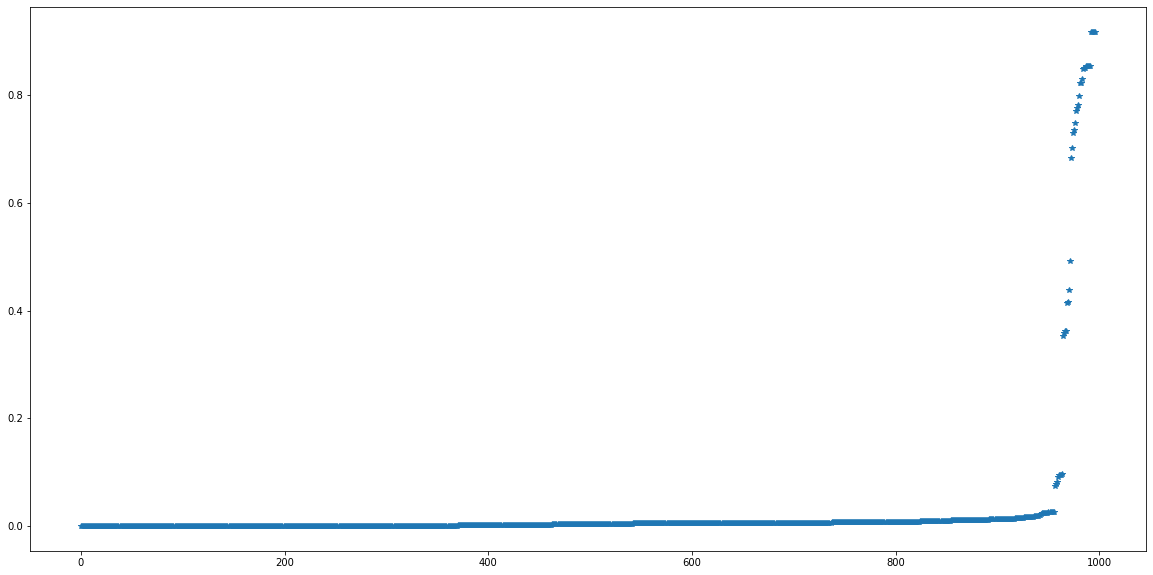

In [370]:
related_docs_indices = cosine_similarities.argsort()

list_cos = []
cosine_similarities[related_docs_indices]
for item in cosine_similarities:
    if item<1:
        list_cos.append(item)
#np.where(cosine_similarities<0.01)
plt.figure(figsize=(20,10))
plt.plot(list_cos, '*')
plt.show()


In [395]:
zip_list = list(zip(cosine_similarities, related_docs_indices))

prediction_df = pd.DataFrame(columns = ['News', 'Cluster'])

for similarity, index in zip_list:
    if similarity == 0:
        prediction_df = prediction_df.append({'News': detokenized_doc[index], 'Cluster': 'Cluster A'}, ignore_index=True)
    elif(similarity>0) & (similarity<= 0.005):
        prediction_df = prediction_df.append({'News': detokenized_doc[index], 'Cluster': 'Cluster B'}, ignore_index=True)
    elif(similarity>0.005) & (similarity<= 0.5):
        prediction_df = prediction_df.append({'News': detokenized_doc[index], 'Cluster': 'Cluster C'}, ignore_index=True)
    elif(similarity>0.5) & (similarity<= 1.01):
        prediction_df =prediction_df.append({'News': detokenized_doc[index], 'Cluster': 'Cluster D'}, ignore_index=True)

In [396]:
prediction_df

News  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [359]:
cosine_similarities[related_docs_indices]
#clustered_list = []
#for items in cosine_similarities:
#    print(items)
related_docs_indices
print('CUMLENIN ASLI:', detokenized_doc[0])
print('\n')
print('EN ALAKASIZ:', detokenized_doc[834])
print('\n')
print('EN ALAKALI:', detokenized_doc[12])

i=0
#for kelime in cosine_similarities:

CUMLENIN ASLI: euro bölgesi büyüme öngörüsü altı yılın düşüğündeimf euro bölgesi büyüme öngörüsünü altı yılın düşük düzeyine çektiuluslararası para fonu bölgesel ekonomik görünüm raporunda euro bölgesi gayrisafi yurt hasılasının altı yılın düşük büyüme hızına gerileyerek yılında yüzde düşüşle yüzde düzeyinde gerçekleşeceğini öngördü euro bölgesi yılına ilişkin büyüme tahminlerini yüzde yüzde düşüren düşüşün nedeni olarak almanya i̇talya ekonomilerinde görülen zayıflamayı gösterdi imf ülkeden oluşan euro bölgesi büyüme öngörüsünü önceki yüzde düzeyinden yüzde revize etti euro bölgesi büyümesi yüzde düzeyindeydi almanya i̇talya önceki büyüme tahminlerini revize eden yavaşlamanın çoğunlukla euro bölgesinin büyük ekonomisi almanya daki zayıf büyüme üçüncü büyük ekonomisi i̇talya daki durgunluktan kaynaklandığını ifade etti imf almanya ekonomisindeki büyüme beklentisini nisan tahmini olan yüzde yüzde i̇talyan ekonomisinin duraklayacağını öngörerek büyüme beklentisini yüzde yüzde düşürdü eti